In [ ]:
!pip install geopandas
!pip install momepy
!pip install contextily
!pip install libpysal
!pip install osmnx
!pip install pygeos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 66.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple,

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import momepy
import numpy as np
import networkx as nx
import osmnx as ox
from contextily import add_basemap
from libpysal import weights
from shapely import wkt
from shapely.geometry import Point
from shapely.geometry import LineString
gpd.options.use_pygeos = True

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-2-0abc83947e6f>:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling Py

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
edgeLinelatlon = pd.read_csv('/content/gdrive/MyDrive/AIA23_Studio_G03/Datasets/Nodes-Edges/G03_Edges_LineLatLon.csv')
print(edgeLinelatlon)
edgeLinelatlon.info()
edgeLinelatlon['geometry'] = edgeLinelatlon.apply(lambda row: LineString([(row['lon1'],row['lat1']), (row['lon2'],row['lat2'])]), axis=1)
geo_df = gpd.GeoDataFrame(edgeLinelatlon, geometry = 'geometry', crs='EPSG:4326')
geo_df

            lat1        lon1       lat2        lon2
0     -37.818289  144.965171 -37.818305  144.965178
1     -37.818305  144.965178 -37.818537  144.965285
2     -37.818537  144.965285 -37.818627  144.965327
3     -37.818627  144.965327 -37.818671  144.965347
4     -37.818671  144.965347 -37.818802  144.965411
...          ...         ...        ...         ...
15168 -37.805884  144.973027 -37.805798  144.973078
15169 -37.805798  144.973078 -37.805667  144.973140
15170 -37.805667  144.973140 -37.805363  144.973226
15171 -37.801112  144.972295 -37.801136  144.972293
15172 -37.801136  144.972293 -37.801247  144.972281

[15173 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15173 entries, 0 to 15172
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat1    15173 non-null  float64
 1   lon1    15173 non-null  float64
 2   lat2    15173 non-null  float64
 3   lon2    15173 non-null  float64
dtypes: float64(4)
m

,lat1,lon1,lat2,lon2,geometry
0,-37.818289,144.965171,-37.818305,144.965178,"LINESTRING (144.96517 -37.81829, 144.96518 -37..."
1,-37.818305,144.965178,-37.818537,144.965285,"LINESTRING (144.96518 -37.81831, 144.96528 -37..."
2,-37.818537,144.965285,-37.818627,144.965327,"LINESTRING (144.96528 -37.81854, 144.96533 -37..."
3,-37.818627,144.965327,-37.818671,144.965347,"LINESTRING (144.96533 -37.81863, 144.96535 -37..."
4,-37.818671,144.965347,-37.818802,144.965411,"LINESTRING (144.96535 -37.81867, 144.96541 -37..."
...,...,...,...,...,...
15168,-37.805884,144.973027,-37.805798,144.973078,"LINESTRING (144.97303 -37.80588, 144.97308 -37..."
15169,-37.805798,144.973078,-37.805667,144.973140,"LINESTRING (144.97308 -37.80580, 144.97314 -37..."
15170,-37.805667,144.973140,-37.805363,144.973226,"LINESTRING (144.97314 -37.80567, 144.97323 -37..."
15171,-37.801112,144.972295,-37.801136,144.972293,"LINESTRING (144.97230 -37.80111, 144.97229 -37..."


In [ ]:
# G = momepy.gdf_to_nx(geo_df, approach='primal')

In [ ]:
# positions = {n: [n[0], n[1]] for n in list(G.nodes)}

# # Plot
# f, ax = plt.subplots(figsize=(12,12), sharex=True, sharey=True)
# ax.set_title("Graph")
# ax.axis('off')
# nx.draw(G, positions, ax=ax, node_size=0)

In [ ]:
edges = pd.read_csv('/content/gdrive/MyDrive/AIA23_Studio_G03/Datasets/Nodes-Edges/G03_Edges.csv')
# Normalize Weight Columns
edges['length'] = edges['length'] / edges['length'].max()
edges['sunhours'] = edges['sunhours'] / edges['sunhours'].max()
print(edges)
edges.info()

          vi     vj    length  sunhours   df  stp
0          0      1  0.004988  0.000000  0.0  1.0
1          1      2  0.069825  0.528583  0.0  1.0
2          2      3  0.027431  0.929522  0.0  1.0
3          3      4  0.012469  0.935787  0.0  1.0
4          4      5  0.039900  0.944401  0.0  0.0
...      ...    ...       ...       ...  ...  ...
15168  13751  13901  0.027431  0.257635  0.0  1.0
15169  13901  13672  0.039900  0.935787  0.0  1.0
15170  13672  13819  0.087282  0.985121  0.0  1.0
15171  11470  13902  0.007481  0.974941  0.0  0.0
15172  13902  13647  0.029925  0.989037  0.0  0.0

[15173 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15173 entries, 0 to 15172
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   vi        15173 non-null  int64  
 1   vj        15173 non-null  int64  
 2   length    15173 non-null  float64
 3   sunhours  15173 non-null  float64
 4   df        15173 non-null  f

In [ ]:
edges_w_Lines = pd.concat([edges,geo_df], axis=1)

In [ ]:
geo_wieghtedEdge = gpd.GeoDataFrame(edges_w_Lines, geometry = 'geometry', crs='EPSG:3857')
droplist = ['lat1','lon1','lat2','lon2']
geo_wieghtedEdge.drop(droplist, axis=1, inplace=True)
geo_wieghtedEdge['u'] = geo_wieghtedEdge['vi']
geo_wieghtedEdge['v'] = geo_wieghtedEdge['vj']
geo_wieghtedEdge['key'] = 0
geo_wieghtedEdge = geo_wieghtedEdge.set_index(['u', 'v', 'key'])

In [ ]:
nodes = pd.read_csv('/content/gdrive/MyDrive/AIA23_Studio_G03/Datasets/Nodes-Edges/G03_Nodes.csv')
print(nodes)
nodes.info()

               x           y     id
0     -37.818289  144.965171      0
1     -37.818305  144.965178      1
2     -37.818537  144.965285      2
3     -37.818627  144.965327      3
4     -37.818671  144.965347      4
...          ...         ...    ...
13898 -37.806172  144.972701  13898
13899 -37.806078  144.972825  13899
13900 -37.805971  144.972933  13900
13901 -37.805798  144.973078  13901
13902 -37.801136  144.972293  13902

[13903 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       13903 non-null  float64
 1   y       13903 non-null  float64
 2   id      13903 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 326.0 KB


In [ ]:
#convert node csv to df to gdf
node_df = pd.DataFrame(
    {'y': list(nodes['y']),
     'x': list(nodes['x'])})

node_gdf = gpd.GeoDataFrame(node_df, geometry=gpd.points_from_xy(node_df.x, node_df.y))
node_gdf['id'] = list(nodes['id'])
node_gdf = node_gdf.set_index('id')
node_gdf

,y,x,geometry
id,,,
0,144.965171,-37.818289,POINT (-37.818 144.965)
1,144.965178,-37.818305,POINT (-37.818 144.965)
2,144.965285,-37.818537,POINT (-37.819 144.965)
3,144.965327,-37.818627,POINT (-37.819 144.965)
4,144.965347,-37.818671,POINT (-37.819 144.965)
...,...,...,...
13898,144.972701,-37.806172,POINT (-37.806 144.973)
13899,144.972825,-37.806078,POINT (-37.806 144.973)
13900,144.972933,-37.805971,POINT (-37.806 144.973)


In [ ]:
#preferences:  0, 1 to 5,  0: don't include in weight, 1: weight the most, 5: weight the least
lengthPref = 3
shadePref = 2
drinkPref = 3
steepPref = 5

#combinedScore = np.array(bikePref*scoredEdges['safetyScore']) + np.array(litPref*scoredEdges['litScore']) + np.array(surfacePref*scoredEdges['pavedScore']) + np.array(lengthPref*scoredEdges['lengthMod']) + np.array(vegPref*scoredEdges['vegScore'] + np.array(windPref*scoredEdges_gdf['windScore']))
combinedScore = np.array(lengthPref*edges['length']) + np.array(shadePref*edges['sunhours']) + np.array(drinkPref*edges['df']) + np.array(steepPref*edges['stp'])
geo_wieghtedEdge['combinedScore'] = combinedScore

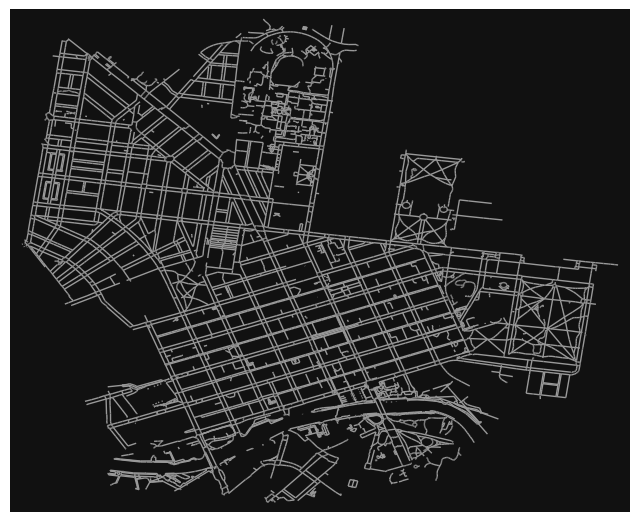

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
G_weighted = ox.graph_from_gdfs(node_gdf, geo_wieghtedEdge)
ox.plot_graph(G_weighted)

In [ ]:
# Get Node IDs
node_ids = list(G_weighted.nodes())
print(node_ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
shortest_path = ox.distance.shortest_path(G_weighted, 1026, 2621,  weight='combinedScore', cpus=1)
print(shortest_path)

[1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1097, 2256, 2591, 1955, 2592, 2593, 1082, 1083, 1084, 1085, 850, 1086, 2607, 2608, 3262, 3263, 2597, 844, 2598, 2619, 2620, 2621]


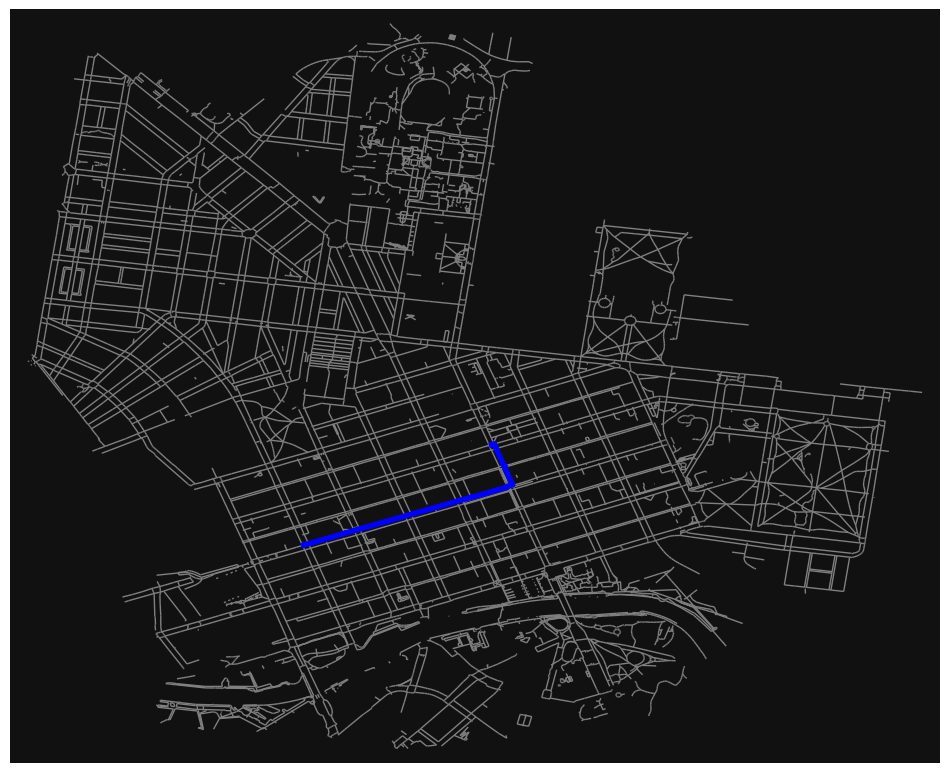

In [ ]:
# Plot Route
fig, ax = ox.plot_graph_route(G_weighted, shortest_path , route_color='blue',
                              route_linewidth= 4,  route_alpha=1, node_size=.1,
                              node_color='white' ,  edge_color='grey' , figsize=(12, 12))

In [ ]:
#Find node closest to start and end points (NEED TO REWRITE THIS USING SINDEX NEAREST)
# Source
# source_address = "99 Spencer Street, Melbourne, Victoria, Australia"
# source_location= ox.geocode(source_address)  # notice the coordinate order (y, x)
# source_point = Point(source_location[1], source_location[0])
# # source_point = Point(144.953186, -37.819258)

# # Target
# target_address = "Royal Exhibition Building and Carlton Gardens, Melbourne, Victoria, Australia"
# target_location = ox.geocode(target_address)
# target_point = Point(target_location[1], target_location[0])
# # target_point = Point(144.97221, -37.808166)

# #Get index of nearest nodes in the graph for the source and target locations
# source_index = node_gdf.sindex.nearest(source_point, return_all=False)
# target_index = node_gdf.sindex.nearest(target_point, return_all=False)
# source_index = list(node_gdf.sindex.nearest(source_point, return_all=False))
# target_index = list(node_gdf.sindex.nearest(target_point, return_all=False))

#get osmid of nearest node
# source_node = list(node_gdf.iloc[[source_index[1][0]]].index)[0]
# target_node = list(node_gdf.iloc[[target_index[1][0]]].index)[0]
# source_node = node_gdf.loc[source_index]
# target_node = node_gdf.loc[target_index]
source_node = 58
target_node = 222

# print(source_point)
# print(source_index)
# print(target_point)
# print(target_index)
print(source_node)
print(target_node)

58
222


In [ ]:
# Get Node IDs
node_ids = list(G_weighted.nodes())
print(node_ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
#shortest route
route_length = ox.distance.shortest_path(G_weighted, source_node, target_node,  weight='length', cpus=1)
print(route_length)

[58, 59, 60, 61, 62, 63, 64, 65, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 2022, 2023, 1033, 1617, 1618, 1619, 1620, 973, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1453, 1687, 1688, 1689, 1690, 1670, 1682, 1683, 1684, 1685, 1686, 1399, 1402, 1407, 1408, 1409, 1410, 1411, 1412, 1420, 1421, 1422, 1423, 874, 875, 219, 220, 221, 222]


In [ ]:
#shortest route
route = ox.distance.shortest_path(G_weighted, source_node, target_node,  weight='combinedScore', cpus=1)
print(route)

[58, 59, 60, 61, 62, 97, 75, 419, 420, 421, 422, 423, 424, 425, 2311, 338, 1567, 1575, 1576, 1577, 1578, 1579, 1507, 1586, 1587, 1588, 1589, 1314, 1315, 1316, 1305, 1306, 1307, 1308, 1309, 1310, 1322, 1323, 1332, 1333, 1338, 1196, 1349, 1350, 1351, 1355, 1356, 1360, 1361, 1051, 1052, 1053, 3077, 3078, 3079, 3080, 959, 960, 961, 1374, 1378, 1379, 1380, 1381, 1382, 1383, 1395, 1396, 1397, 1398, 1399, 1402, 1407, 1408, 1409, 1410, 1411, 1412, 1420, 1421, 1422, 1423, 874, 875, 219, 220, 221, 222]


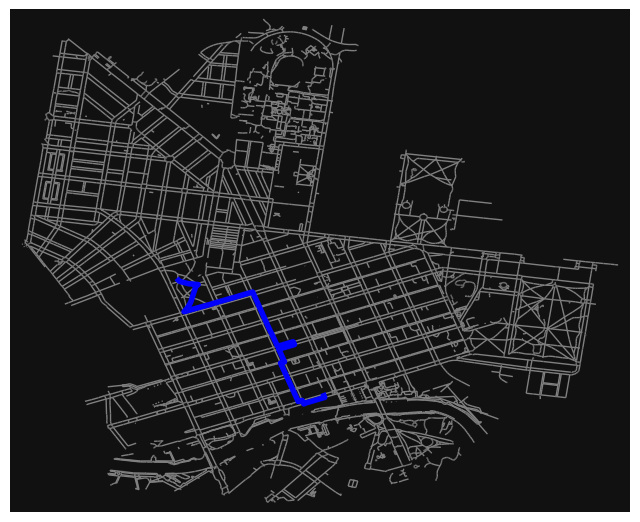

In [ ]:
# Plot CombindedScore Route
fig, ax = ox.plot_graph_route(G_weighted, route, route_color='blue',
                              route_linewidth= 4,  route_alpha=1, node_size=.1,
                              node_color='white' ,  edge_color='grey' , figsize=(8, 8))

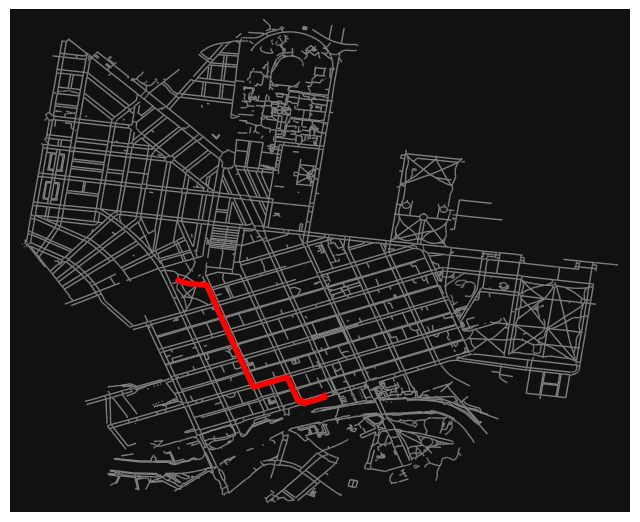

In [ ]:
# Plot LengthRoute
fig, ax = ox.plot_graph_route(G_weighted, route_length, route_color='red',
                              route_linewidth= 4,  route_alpha=1, node_size=.1,
                              node_color='white' ,  edge_color='grey' , figsize=(8, 8))